In this first part, we install import all the packages used

In [1]:
#Packages
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Subpackages
from tqdm import tqdm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix


#ImportFunctions
from Functions import fetch_data
from Functions import moving_average
from Functions import rsi
from Functions import macd
from Functions import lagged_return
from Functions import bollinger_bands
from Functions import pe_ratio
from Functions import daily_returns


Next, we import some stock data

In [2]:
tickers = ['TSLA', 'AAPL', 'AMZN', 'GOOGL', 'AMD', 'GOOG', 'XOM', 'LLY', 'IBM', 'BAC', 'ADBE', 'HES', 'COST', 'ALGN', 'F', 'DIS', 'ANET', 'MO', 'AMT', 'HD', 'HON', 'ABBV', 'GE', 'ACN', 'ENPH', 'COP', 'AMAT', 'FDX', 'DHR', 'EW', 'GM', 'ABT', 'T', 'AMGN', 'ABNB', 'GS', 'HSY', 'ADP', 'ADI', 'DXCM', 'DG', 'AXP', 'EQIX', 'FI', 'GIS', 'AAL', 'CSX', 'FANG', 'DE', 'CVS', 'DLR', 'EMR', 'ADSK', 'GD', 'HAS', 'AZO', 'GILD', 'HUM', 'CCI', 'FCX', 'HCA', 'MMM', 'AON', 'HAL', 'ETN', 'BKR', 'APH', 'DAL', 'HLT', 'AMP', 'IDXX', 'CTRA', 'ALB', 'FTNT', 'EQT', 'ELV', 'EOG', 'DOW', 'ITW', 'D', 'AJG', 'EXC', 'EXPE', 'DUK', 'DLTR', 'FICO', 'DVN', 'GPN', 'EG', 'ETSY', 'AEP', 'DHI', 'HPQ', 'ADM', 'ALL', 'EBAY', 'AVB', 'EL', 'GEHC', 'IEX']

start_date = "2013-10-01"
end_date = "2023-10-01"

stock_data = fetch_data(tickers, start_date, end_date)

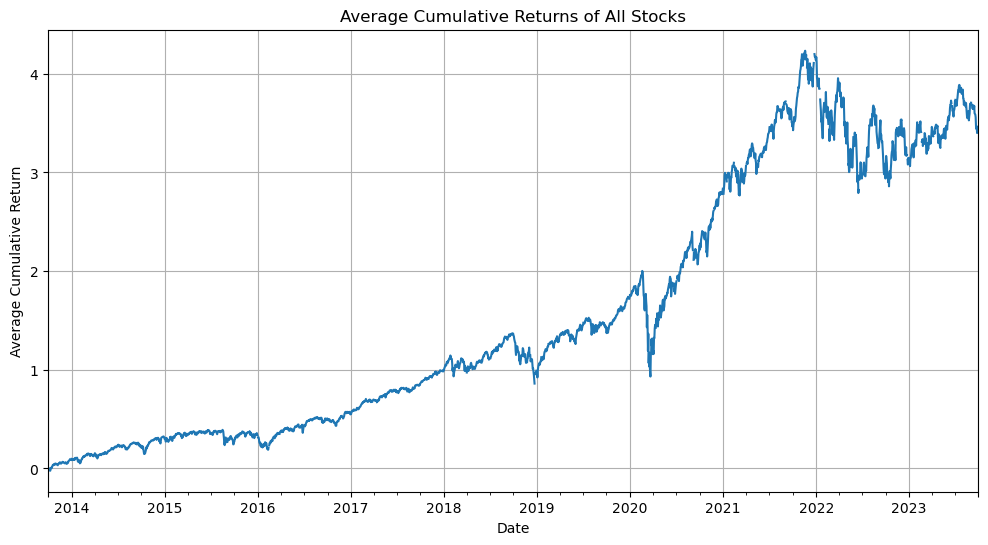

In [7]:
# Calculate daily and cumulative returns for each stock
cumulative_returns = pd.DataFrame(index=pd.date_range(start_date, end_date, freq='B'))

for ticker in tickers:
    # Calculate daily returns
    daily_returns = stock_data[ticker]['Adj Close'].pct_change()
    
    # Calculate cumulative returns
    cumulative_returns[ticker] = (1 + daily_returns).cumprod() - 1

# Calculate the average cumulative returns across all stocks
average_cumulative_returns = cumulative_returns.mean(axis=1)

# Plotting the average cumulative returns
plt.figure(figsize=(12, 6))
average_cumulative_returns.plot(title='Average Cumulative Returns of All Stocks')
plt.xlabel('Date')
plt.ylabel('Average Cumulative Return')
plt.grid(True)
plt.show()

Now we calculate the number of ups and downs 

In [8]:
# Initialize a DataFrame to store the up and down day counts
up_down_counts = pd.DataFrame(index=tickers, columns=['Up Days', 'Down Days'])

for ticker in tickers:
    # Calculate daily returns
    daily_returns = stock_data[ticker]['Adj Close'].pct_change()
    
    # Count up and down days
    up_down_counts.loc[ticker, 'Up Days'] = (daily_returns > 0).sum()
    up_down_counts.loc[ticker, 'Down Days'] = (daily_returns < 0).sum()

# Display the table for the first few stocks
print(up_down_counts.head())

      Up Days Down Days
TSLA     1300      1213
AAPL     1331      1179
AMZN     1340      1173
GOOGL    1329      1185
AMD      1265      1188


In [10]:
# Total number of trading days for calculation of percentages
total_days = stock_data[list(stock_data.keys())[0]].shape[0]

# Adding columns for percentage calculations
up_down_counts['% Up Days'] = (up_down_counts['Up Days'] / total_days) * 100

# Calculate the average percentage of up and down days across all stocks
average_percent_up = up_down_counts['% Up Days'].mean()

# Display the average percentages
print(f"Average Percentage of Up Days: {average_percent_up:.2f}%")



Average Percentage of Up Days: 50.94%
